Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Data

In [2]:
df = pd.read_csv (r'/Users/amanjalan/Downloads/UMichMLTrial(2).csv')

In [3]:
df.drop('Timestamp', axis = 1, inplace = True)

Making the columns readable now

In [4]:
df.rename(columns = {'Did you get into the University of Michigan?':'Accepted'},inplace = True)
df.rename(columns = {'What was the nature of your application to the University of Michigan?':'EA/RA','If you took the SAT, what was your score out of 1600 (Ex. 1500)?':'SAT','If you took the ACT, what was your score out of 36 (Ex. 34)?':'ACT'},inplace = True)
df.rename(columns = {'Where would you rank yourself academically in class?':'Rank','What College within the University of Michigan did you apply to?':'College'},inplace = True)
df.rename(columns = {'How many SAT Subject Test Scores were submitted with a score of >= 700?':'SAT II'},inplace = True)
df.rename(columns = {'How many AP Test Scores were submitted with a score of >= 3?':'AP', 'How many IB Test Scores were submitted with a score of >= 5?':'IB', 'What gender identity do you most identify with?':'Gender','What was your residency status when you applied to the University of Michigan?':'Residency Status', 'Were you considered a legacy (i.e. your parents or siblings went to the University of Michigan)?':'Legacy', 'Were you considered a first-generation college student (i.e. you were the first in your family to go to college)?':'First-Gen', 'Did you ask for Financial Aid?':'Financial Aid'}, inplace = True)
df.rename(columns = {'Were you a part of Student government at your school?':'Student Gov','Did you have any notable leadership positions in high school (i.e. President/Vice-President of a club)?':'Leadership', 'Please indicate your ethnicity?':'Ethnicity','Were you a member of a Sports team in high school (Dedicated 100+ hours)?':'Sports','Did you volunteer in high school (Dedicated 100+ hours)?':'Volunteer','Did you participate in the performing arts (dance, drama and other forms of artistic expressions) while in high school (100+ hours)?':'Performing Arts',"If you'd like to be considered for the Amazon gift card raffle, please enter an email id that we can send the gift card to (Optional)":'Email'}, inplace = True)

Removing Invalid Entries: 1) No SAT and ACT 2) insnanely low SAT/ACT scores (1000/11) 3) SAT Score not ending with 0

In [5]:
ScamEntry = (df['SAT'].isnull() & df['ACT'].isnull())

In [6]:
ScamIndices = df[ScamEntry].index

In [7]:
df.drop(ScamIndices, inplace = True)

In [8]:
df.reset_index(drop=True, inplace = True)

TODO: Need to check manually

In [9]:
df[(df['ACT'] <= 11)]

,Accepted,College,EA/RA,SAT,ACT,Rank,SAT II,AP,IB,Gender,...,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Email
151,No,"College of Literature, Science, and the Arts (...",Early Action / EA,1150.0,0.0,Top 50%,0,0,0,Male,...,In-State,No,Yes,Yes,No,No,No,Yes,No,mrgraffittiart@gmail.com
641,Yes,Other,Regular Decision / RD,5.0,5.0,Top 50%,1,0,0,Male,...,International,No,Yes,Yes,Yes,No,Yes,No,Yes,voluntary bias much?


In [10]:
df.drop(df.index[641],inplace = True)

In [11]:
df.reset_index(drop=True, inplace = True)

In [12]:
df[(df['SAT'] < 1000)]

,Accepted,College,EA/RA,SAT,ACT,Rank,SAT II,AP,IB,Gender,...,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Email
636,Yes,Ross School of Business,Early Action / EA,800.0,17.0,Top 10%,0,0,0,Female,...,In-State,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Amills1600@yahoo.com


In [13]:
df.drop(df.index[636],inplace = True)

In [14]:
df.reset_index(drop=True, inplace = True)

In [15]:
ScoreTemp = df['SAT'].dropna()

In [16]:
ScoreTempIndex = ScoreTemp[ScoreTemp%10 != 0].index

In [17]:
df.drop(ScoreTempIndex, inplace = True)

In [18]:
df.reset_index(drop=True, inplace = True)

Seperate Email Id and turn it into lottery (and filter out lottery)

In [19]:
Lottery = df['Email']

In [20]:
Lottery.dropna(inplace = True)

In [21]:
Lottery.reset_index(drop=True, inplace = True)

In [22]:
df.drop('Email',axis = 1,inplace = True)

Convert SAT and ACT score to one column

In [23]:
def ConvertScore(SatScore):
    if (np.isnan(SatScore)):
        return 0
    elif (SatScore >= 1570 and SatScore <= 1600):
        return 36
    elif (SatScore >= 1530 and SatScore <= 1560):
        return 35
    elif (SatScore >= 1490 and SatScore <= 1520):
        return 34
    elif (SatScore >= 1450 and SatScore <= 1480):
        return 33
    elif (SatScore >= 1420 and SatScore <= 1440):
        return 32
    elif (SatScore >= 1390 and SatScore <= 1410):
        return 31
    elif (SatScore >= 1360 and SatScore <= 1380):
        return 30
    elif (SatScore >= 1330 and SatScore <= 1350):
        return 29
    elif (SatScore >= 1300 and SatScore <= 1320):
        return 28
    elif (SatScore >= 1260 and SatScore <= 1290):
        return 27
    elif (SatScore >= 1230 and SatScore <= 1250):
        return 26
    elif (SatScore >= 1200 and SatScore <= 1220):
        return 25
    elif (SatScore >= 1160 and SatScore <= 1190):
        return 24
    elif (SatScore >= 1130 and SatScore <= 1150):
        return 23
    elif (SatScore >= 1100 and SatScore <= 1120):
        return 22
    elif (SatScore >= 1060 and SatScore <= 1090):
        return 21
    elif (SatScore >= 1030 and SatScore <= 1050):
        return 20
    elif (SatScore >= 990 and SatScore <= 1020):
        return 19
    elif (SatScore >= 960 and SatScore <= 980):
        return 18
    elif (SatScore >= 920 and SatScore <= 950):
        return 17
    elif (SatScore >= 880 and SatScore <= 910):
        return 16
    elif (SatScore >= 830 and SatScore <= 870):
        return 15
    elif (SatScore >= 780 and SatScore <= 820):
        return 14
    elif (SatScore >= 730 and SatScore <= 770):
        return 13
    elif (SatScore >= 690 and SatScore <= 720):
        return 12
    elif (SatScore >= 650 and SatScore <= 680):
        return 11
    elif (SatScore >= 620 and SatScore <= 640):
        return 10
    elif (SatScore >= 590 and SatScore <= 610):
        return 9
    else:
        return 0
    
    

In [24]:
df['ConvertedAct'] = df.SAT.apply(ConvertScore)

In [25]:
def ActFix(Score):
    if (np.isnan(Score)):
        return 0
    else:
        return Score

In [26]:
df['ACT'] = df.ACT.apply(ActFix)

In [27]:
def ChooseScore(row):
    if (row.ACT >= row.ConvertedAct):
        return row.ACT
    else:
        return row.ConvertedAct

In [28]:
df['Standardized Score'] = df.apply(ChooseScore, axis = 1)

In [29]:
df.drop(['SAT','ACT','ConvertedAct'], axis = 1, inplace = True)

In [30]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,35.0
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,34.0
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,34.0
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,35.0
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,35.0


Data Visualization

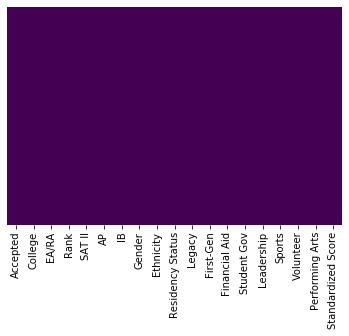

In [31]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

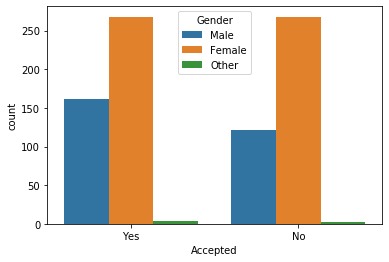

In [32]:
sns.countplot(x = 'Accepted', hue = 'Gender', data = df)

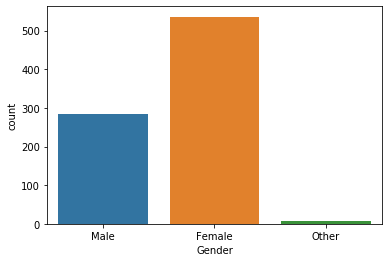

In [33]:
sns.countplot(x = 'Gender',data = df)

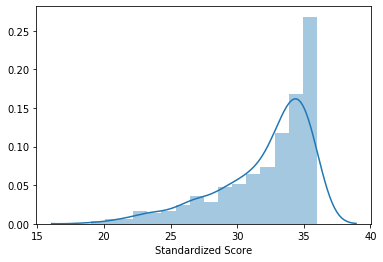

In [34]:
sns.distplot(df['Standardized Score'])

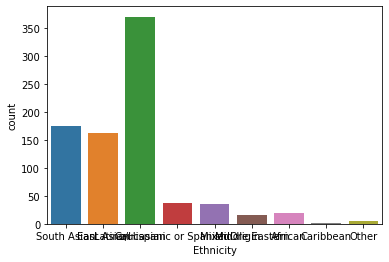

In [35]:
sns.countplot(x = 'Ethnicity', data = df)

Converting Categorical Values

In [36]:
#Accepted = pd.get_dummies(df['Accepted'],drop_first = True).head()
#EARA = pd.get_dummies(df['EA/RA'],drop_first = True).head()
#College = pd.get_dummies(df['College'],drop_first = True).head()
#Rank = pd.get_dummies(df['Rank'],drop_first = True).head()
#SATII = pd.get_dummies(df['SAT II'],drop_first = True).head()




In [37]:
#df = pd.concat([Accepted, EARA, df],axis = 1)

In [38]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,35.0
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,34.0
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,34.0
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,35.0
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,35.0
